# Multiple Linear Regression Model
Shared Bikes Demand Assignment

# Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



### To build a multiple linear regression model for the prediction of demand for shared bikes. 
- Step 1:  Reading and Understanding the Data
- Step 2:  Visualising the Data
- Step 3:  Data Preparation
- Step 4:  Model Building and Evaluation

## Step 1: Reading and Understanding the Data

### Importing neccessary Libraries

In [1]:
# For data analysis and numerical computations
import pandas as pd
import numpy as np

# For Data Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Loading and Reading Dataset

In [2]:
df_BikeSharing = pd.read_csv('day.csv')
df_BikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df_BikeSharing.shape

(730, 16)

In [4]:
df_BikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df_BikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Handling Missing Values:

In [6]:
# Checking for null values
df_BikeSharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Inference : There are no Null Values.

In [7]:
# Dropping some columns which are not needed
# column instant as it represent only the record index
# column dteday is Date but we have Year,Month and Working day and Weekend too
# column casual and registered : As 'cnt' variable indicates the total number of bike rentals, including both casual and registered.

cols = ['instant','dteday','casual','registered']
df_BikeSharing.drop(columns = cols , inplace=True)

In [8]:
df_BikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
df_BikeSharing.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [10]:
df_BikeSharing.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [11]:
# Coverting below columns  from numeric to string values
df_BikeSharing.season = df_BikeSharing.season.map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})

df_BikeSharing.weathersit = df_BikeSharing.weathersit.map({1 : 'Clear', 2 : 'Mist', 3 : 'LightSnow', 4 : 'HeavyRainfall'})

df_BikeSharing.mnth = df_BikeSharing.mnth.map({1 : 'Jan',2 : 'Feb',3 : 'Mar',4 : 'Apr',5 : 'May',6 : 'Jun',7 : 'Jul',8 : 'Aug',9 : 'Sep',10 : 'Oct',11 : 'Nov',12 : 'Dec'})

df_BikeSharing.weekday = df_BikeSharing.weekday.map({0 : 'Sun',1 : 'Mon',2 : 'Tue',3 : 'Wed',4 : 'Thu',5 : 'Fri',6 : 'Sat'})

In [12]:
df_BikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
df_BikeSharing.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [16]:
df_BikeSharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [17]:
# Converting dtype of below columns to Category type
for col in ['season','yr','mnth','holiday','weekday','workingday','weathersit']:
    df_BikeSharing[col] = df_BikeSharing[col].astype('category')

In [18]:
df_BikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [19]:
df_BikeSharing.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [20]:
# Renaming few columns for better readibility

df_BikeSharing.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [21]:
df_BikeSharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Handling Outliers:

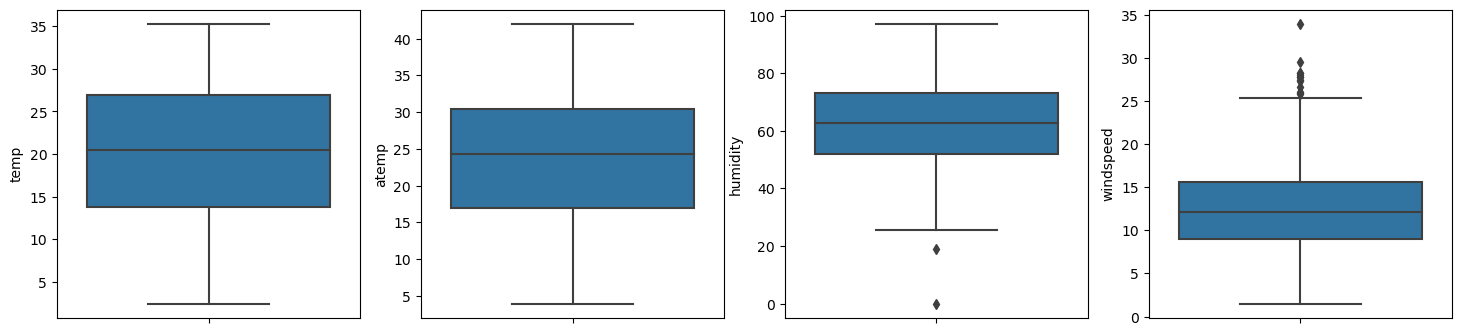

In [22]:
# Draw box plots for indepent variables with continuous values
num_cols = ['temp','atemp','humidity','windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in num_cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df_BikeSharing)
    i+=1

#### Inference: There  are no Outliers to be handled.

# EDA
## Step 2: Visualising the Data

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
num_cols = ['temp','atemp','humidity','windspeed','cnt']
cat_cols = ['season','year','month','holiday','weekday','workingday','weathersit']

#### Plotting Pair plot to check linear relationship

<Figure size 1500x3000 with 0 Axes>

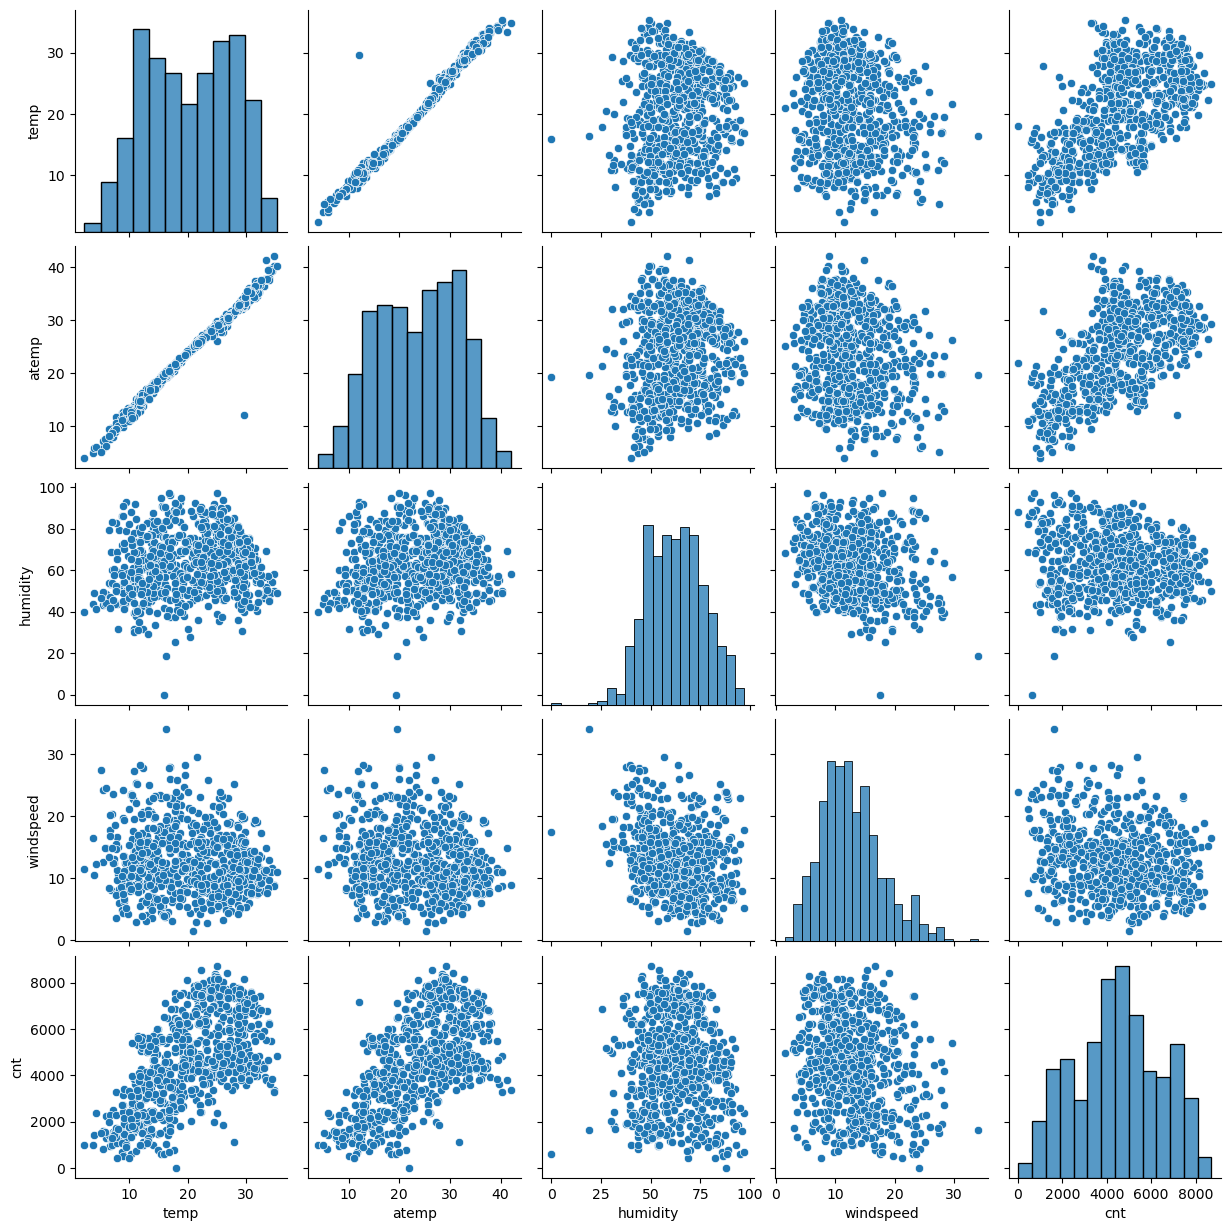

In [25]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=df_BikeSharing,vars=num_cols)
plt.show()

#### Inference:
- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other
- Target variable cnt has a linear relationship with independent variables like temp, atemp.

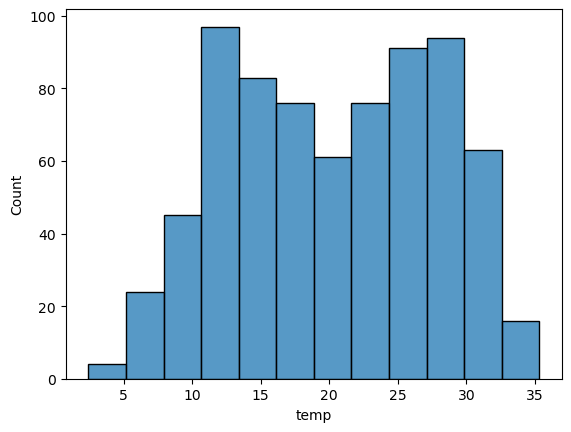

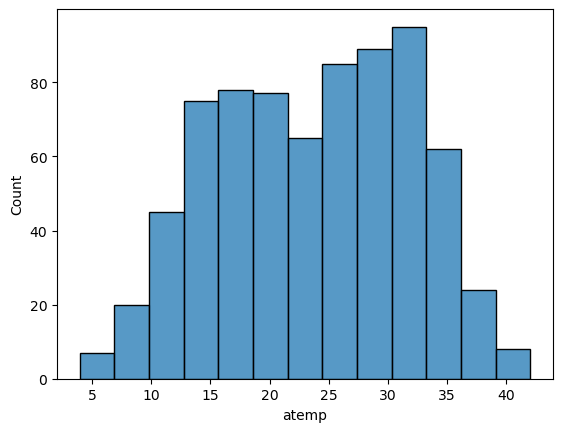

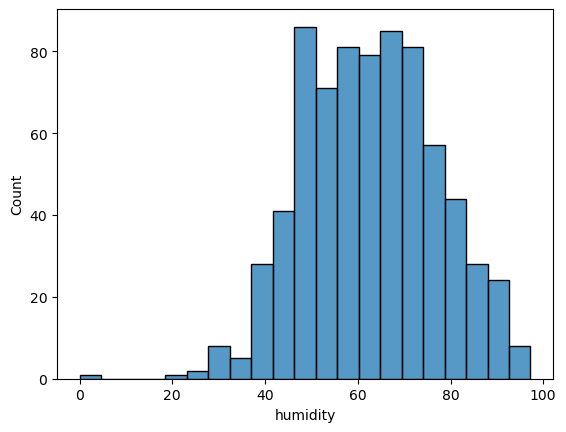

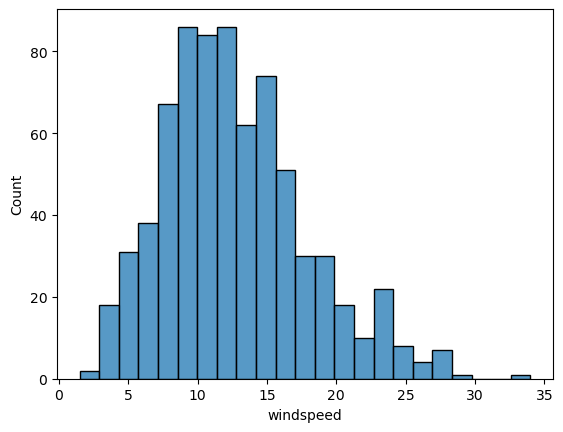

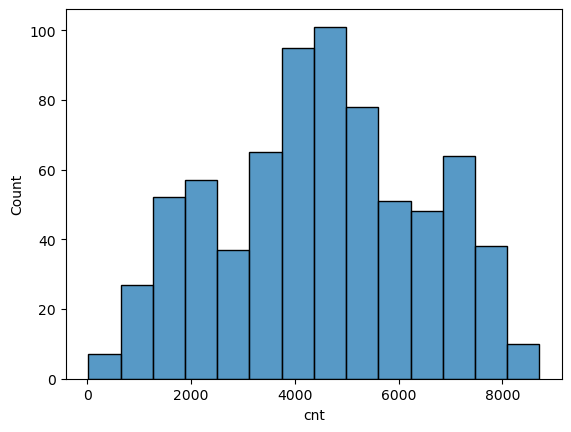

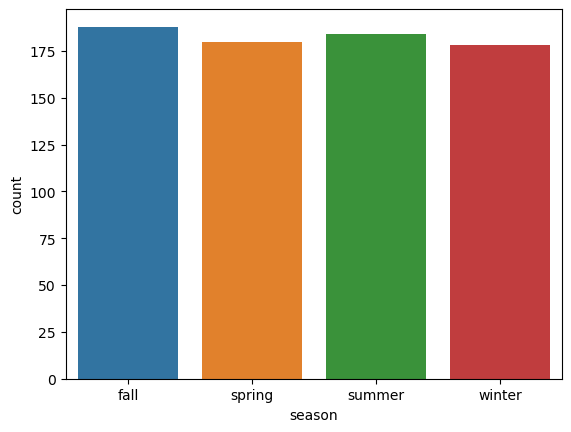

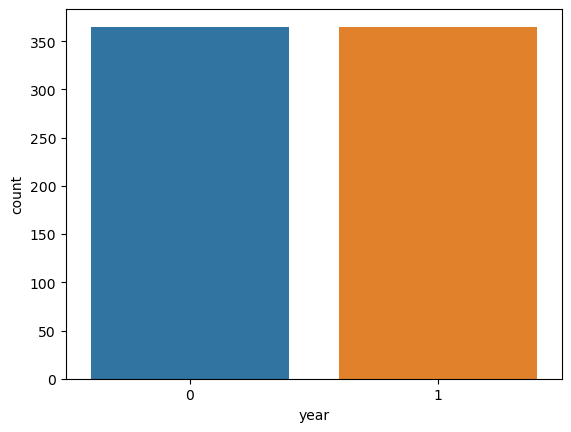

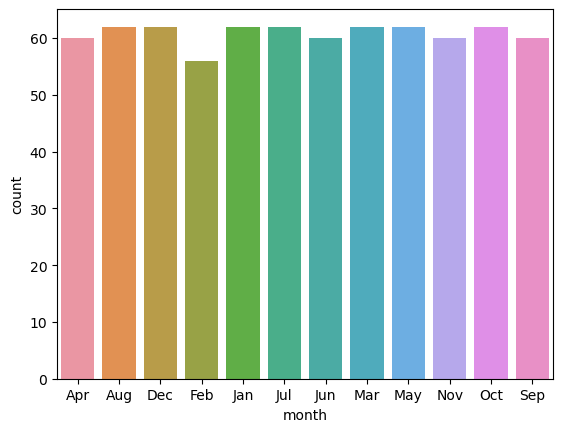

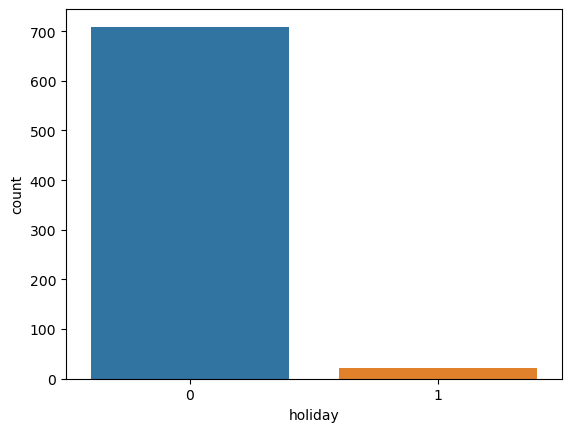

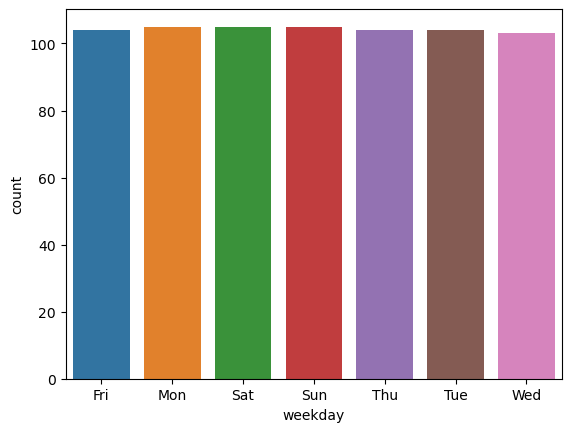

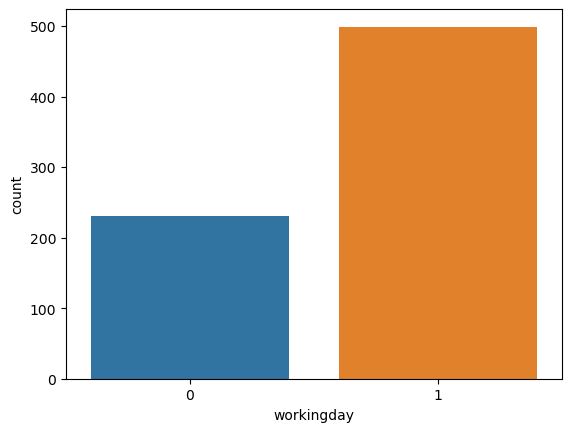

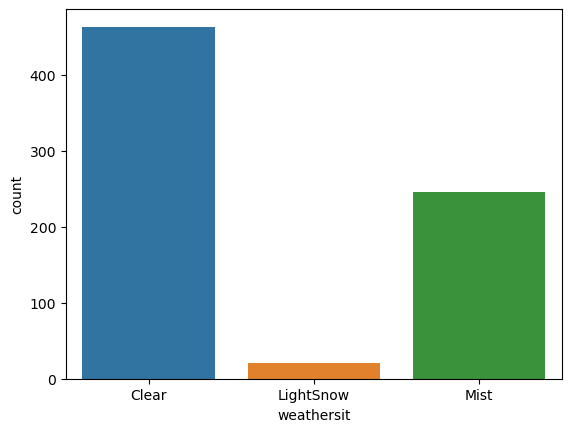

In [26]:
# Univariate Analysis
for i in num_cols:
    sns.histplot(x=df_BikeSharing[i])
    plt.show()
for i in cat_cols:
    sns.countplot(x=df_BikeSharing[i])
    plt.show()

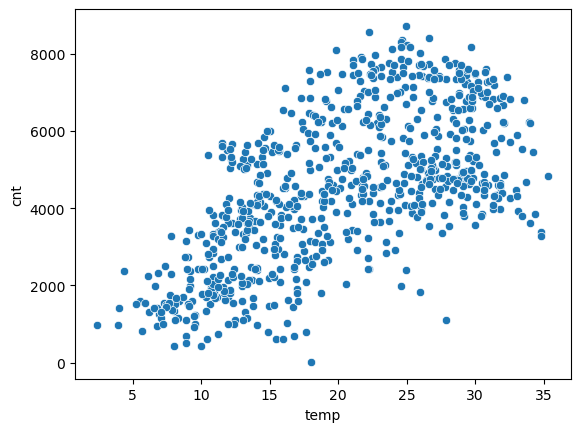

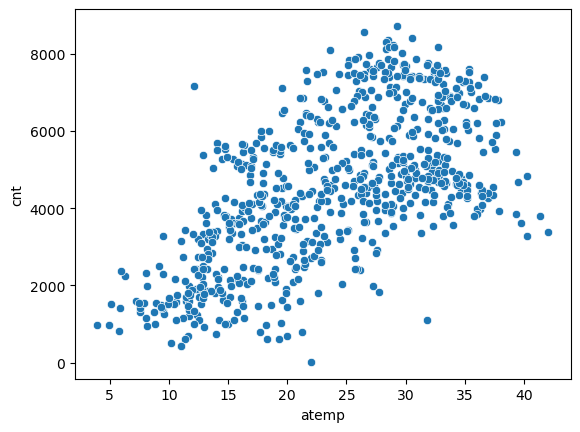

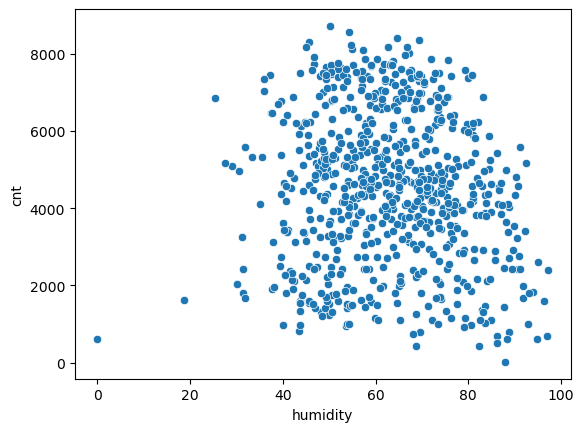

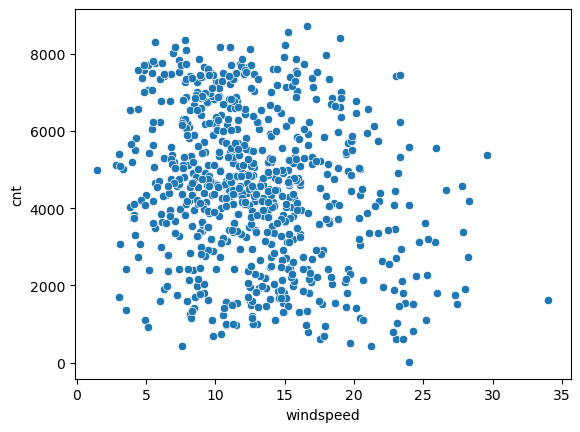

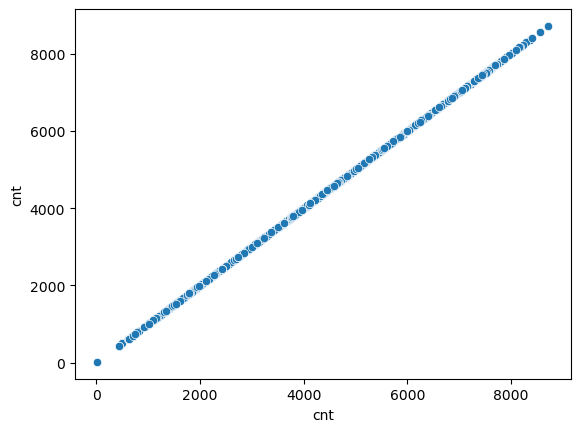

In [27]:
# Bivariate Analysis

for i in num_cols:
    sns.scatterplot(x=df_BikeSharing[i],y=df_BikeSharing['cnt'])
    plt.show()

### Visualising Categorical Variables:

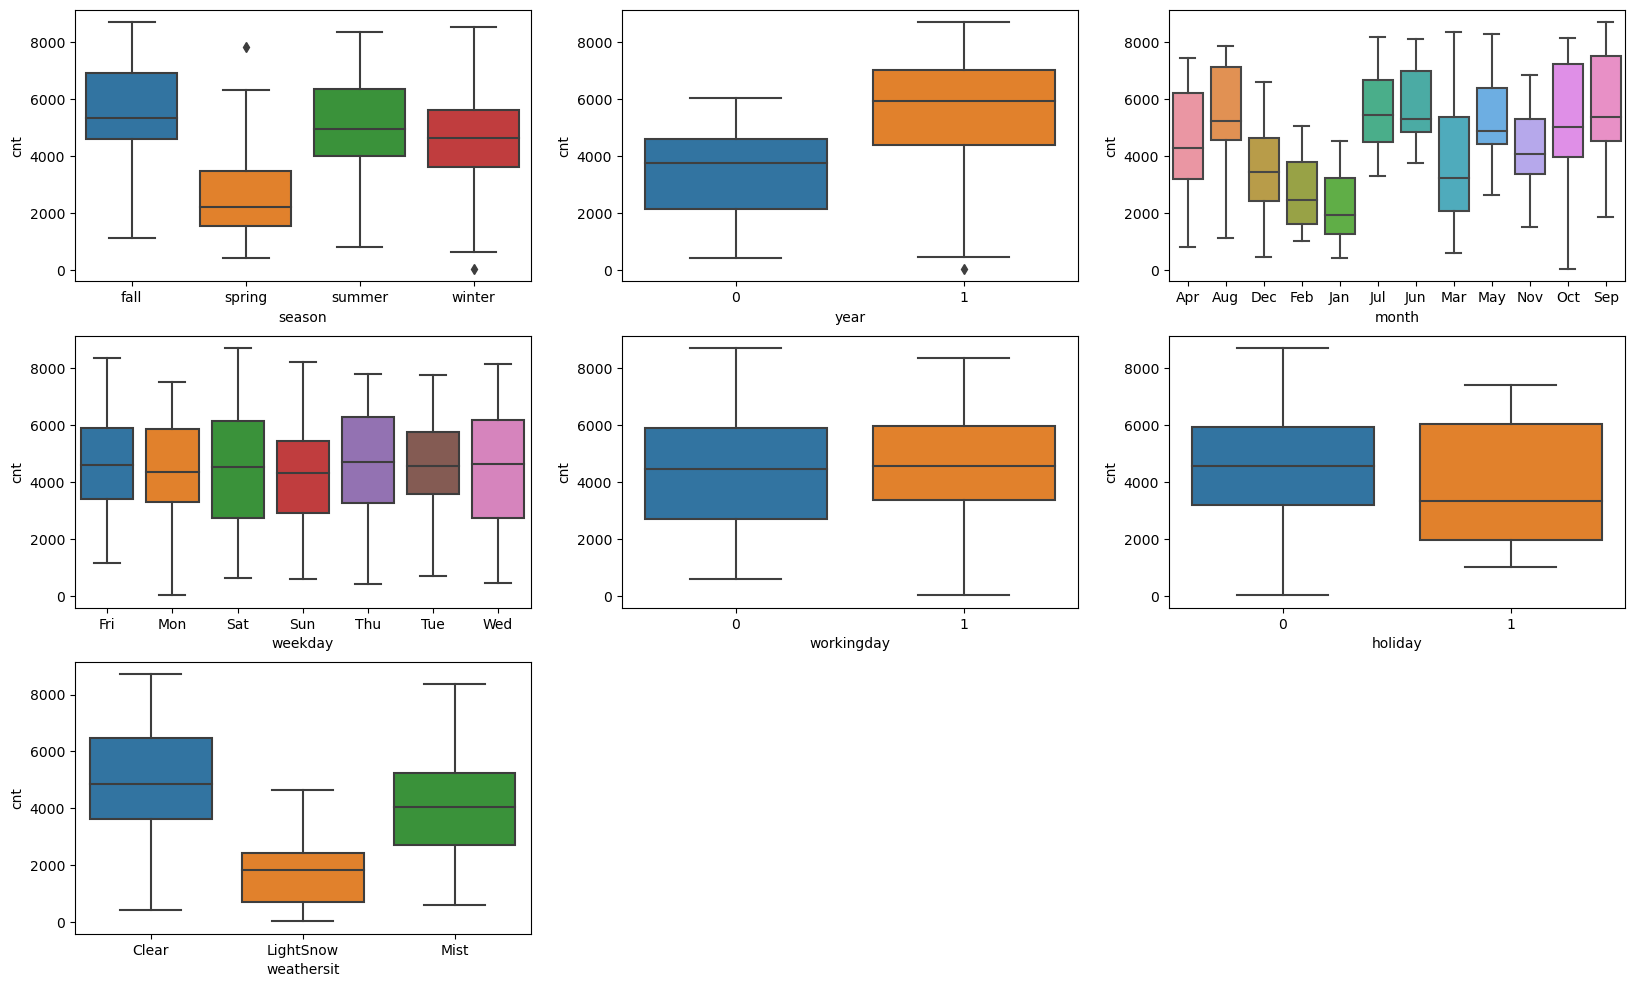

In [28]:
# Visualising Categorical Data:

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_BikeSharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'cnt', data = df_BikeSharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'cnt', data = df_BikeSharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_BikeSharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_BikeSharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_BikeSharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_BikeSharing)
plt.show()
plt.show()

In [29]:
# function to create barplot related to categorical columns:

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=df_BikeSharing)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=df_BikeSharing, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

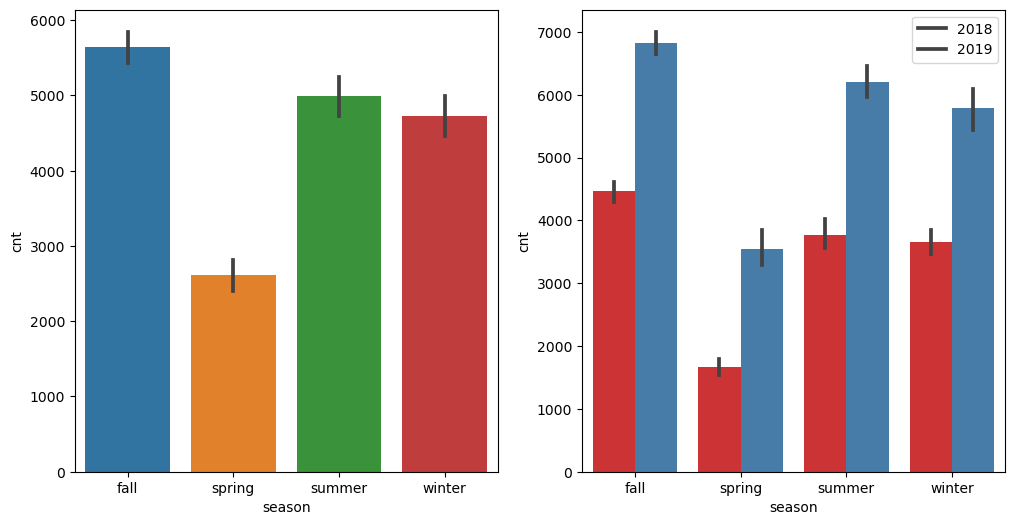

In [30]:
# plotting visualization for season column:

plot_cat_columns('season')

Useful Insights:
- fall season  has highest bookings compare to other seasons
- Booking count has increased from 2018 to 2019

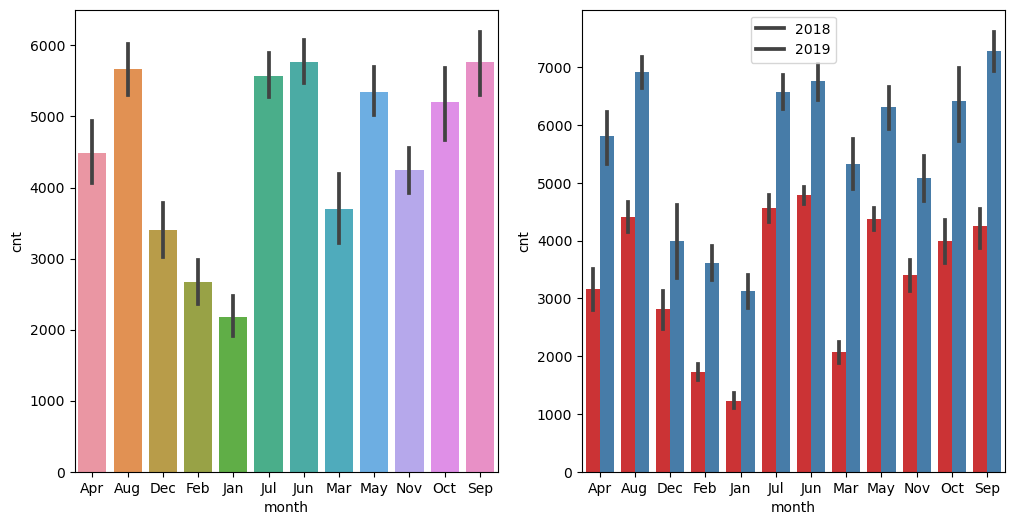

In [31]:
# plotting visualization for month column:

plot_cat_columns('month')

Useful Insights:
- Most of the bookings has been done during the month of may, june, july, aug, sep and oct
- Number of bookings for each month seems to have increased from 2018 to 2019.

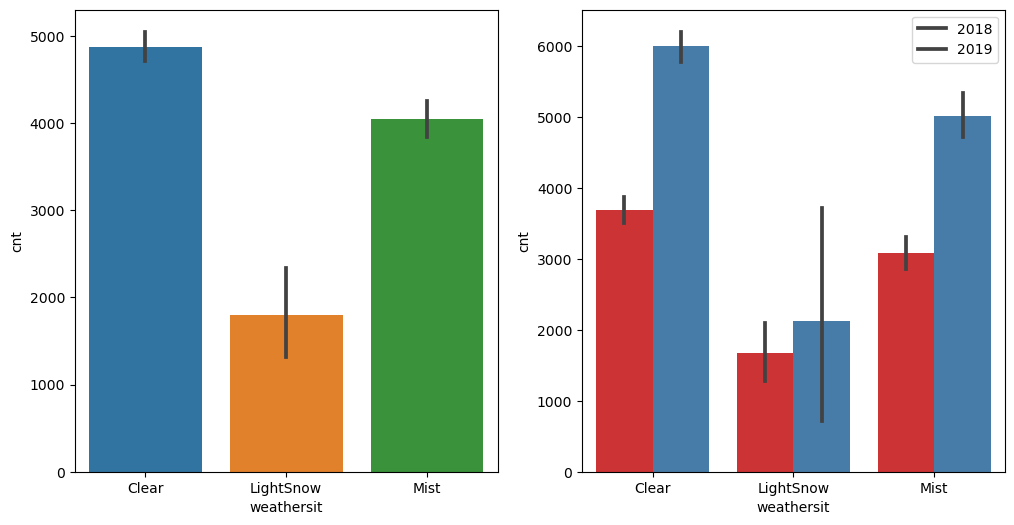

In [32]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

Useful Insights:
- Clear weather has attracted more bookings
- Booking count has increased from 2018 to 2019

In [33]:
# Correlation Matrix

corr_matrix = df_BikeSharing[num_cols].corr()
corr_matrix

,temp,atemp,humidity,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


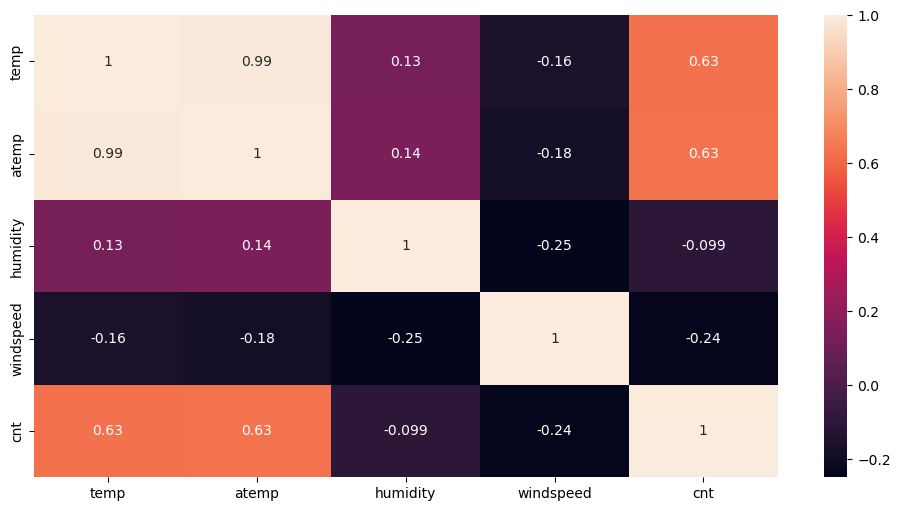

In [34]:
# Multivariate Analysis  --- heatmap is pretty good to visualise multiple correlations between variables.
plt.figure(figsize=(12,6))
sns.heatmap(df_BikeSharing[num_cols].corr(),annot=True)
plt.show()

#### Useful Insights from heatmap:
- independent variables temp and atemp are highly correlated (0.99 almost 1). We have to take care of Multicollinearity.
- target variable cnt is negatively correlated to 'windspeed' (-0.24 approximately). This implies that the shared bikes demand     will be somewhat less on windy days as compared to normal days.

In [35]:
# Dropping atemp column as it is highly correlated with temp
df_BikeSharing.drop('atemp', axis =1, inplace = True)

#### Inference:
- Useful insights can be drawn from the above all plots:

1. Season fall has highest demand for rental bikes.
2. Demand has increased from 2018 to 2019.
3. September month has highest demand. After September, demand is decreasing.
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture about demand.
6. The clear weathersit has highest demand


## Step 3: Data Preparation 

### Creating Dummy Variables(One Hot Encoding)

In [36]:
# Creating Dummy variables for categorical variables : month, weekday, weathersit and season.
# Dropping the first columns as (n-1) dummies can explain n categories.

dum_months     = pd.get_dummies(df_BikeSharing.month,drop_first=True,dtype = int)
dum_weekdays   = pd.get_dummies(df_BikeSharing.weekday,drop_first=True,dtype = int)
dum_weathersit = pd.get_dummies(df_BikeSharing.weathersit,drop_first=True,dtype = int)
dum_seasons    = pd.get_dummies(df_BikeSharing.season,drop_first=True,dtype = int)

In [37]:
df_BikeSharing.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [38]:
# Merging  the dataframe, with the dummy variable dataset. 

df_Bike = pd.concat([df_BikeSharing,dum_months,dum_weekdays,dum_weathersit,dum_seasons],axis=1)

In [39]:
df_Bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [40]:
df_Bike.shape

(730, 33)

In [41]:
df_Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   humidity    730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
 11  Aug         730 non-null    int32   
 12  Dec         730 non-null    int32   
 13  Feb         730 non-null    int32   
 14  Jan         730 non-null    int32   
 15  Jul         730 non-null    int32   
 16  Jun         730 non-null    int32   
 17  Mar         730 non-null    int32   
 18  May         730 non-null    int32   
 19  Nov     

In [42]:
# dropping unnecessary columns as we have already created dummy variables out of it.

df_Bike.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [43]:
df_Bike.shape

(730, 29)

In [44]:
df_Bike.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


# Step 4: Model Building 

### Splitting the Dataset into Training and Testing Sets

In [45]:
from sklearn.model_selection import train_test_split

# y - contain only target variable
y = df_Bike.pop('cnt')

# X - all independent variables
X = df_Bike

# Split the dataframe into train and test sets in the ration 70 :30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 28)
(219, 28)


### Scaling
- Using MinMaxScaler() to Rescale the features for easy interpretation.
 

In [47]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [48]:
# Let us scale continuous variables
num_vars = ['temp','humidity','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [49]:
X_train.describe()

,temp,humidity,windspeed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist,spring,summer,winter
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.550874,0.654174,0.414873,0.074364,0.074364,0.074364,0.088063,0.091977,0.084149,0.062622,...,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.346380,0.230920,0.258317,0.250489
std,0.227231,0.143648,0.185619,0.262619,0.262619,0.262619,0.283664,0.289276,0.277883,0.242520,...,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.476282,0.421834,0.438138,0.433719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354221,0.544598,0.281934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.575304,0.659940,0.384732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.745079,0.756977,0.526481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
X_train.head()

,year,holiday,workingday,temp,humidity,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist,spring,summer,winter
683,1,0,1,0.327133,0.639330,0.327101,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
645,1,1,0,0.403972,0.731215,0.419004,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
163,0,0,1,0.717562,0.509660,0.708724,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.785745,0.415925,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
640,1,0,1,0.745598,0.817947,0.110593,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [51]:
np.asarray(X_train)

array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

### Building the first model with all the features

In [52]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         2352.431256
year          1950.873694
holiday        222.141579
workingday     868.583445
temp          3732.721399
humidity     -1348.360533
windspeed    -1005.231330
Aug           -119.608918
Dec           -289.689940
Feb            163.711918
Jan             30.058448
Jul           -376.824891
Jun            -30.627712
Mar            482.188553
May            248.856414
Nov           -398.489799
Oct            333.682814
Sep            604.507959
Mon           -156.729980
Sat            826.816611
Sun            434.889621
Thu            -57.687234
Tue           -238.638061
Wed            -90.434336
LightSnow    -1903.173557
Mist          -490.307481
spring       -1224.599200
summer         102.485138
winter         635.732654
dtype: float64

In [53]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [54]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1950.87369393  -365.96623455   280.47563086  3732.7213992
 -1348.36053298 -1005.23133048  -119.60891755  -289.68993952
   163.71191806    30.05844814  -376.82489061   -30.62771173
   482.18855307   248.85641391  -398.48979861   333.6828144
   604.50795885  -156.72997971   238.70879671  -153.21819302
   -57.68723357  -238.63806136   -90.43433625 -1903.17355729
  -490.30748076 -1224.59920043   102.48513803   635.73265419]
2940.5390695120495


### Model 1

In [55]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.56
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.77e-178
Time:                        13:07:27   Log-Likelihood:                -4111.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     483   BIC:                             8398.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2352.4313    327.371      7.186      0.000    1709.184    2995.678
year        1950.8737     70.803     27.554      0.000    1811.754    2089.994
holiday      222.1416    206.181      1.077      0.282    -182.981     627.264
workingday   868.5834    113.490      7.653      0.000     645.588    1091.578
temp        3732.7214    401.977      9.286      0.000    2942.881    4522.562
humidity   -1348.3605    341.176     -3.952      0.000   -2018.732    -677.989
windspeed  -1005.2313    207.437     -4.846      0.000   -1412.821    -597.641
Aug         -119.6089    295.970     -0.404      0.686    -701.157     461.939
Dec         -289.6899    301.394     -0.961      0.337    -881.896     302.516
Feb          163.7119    305.837      0.535      0.593    -437.223     764.647
Jan           30.0584    311.204      0.097      0.923    -581.423     641.540
Jul         -376.8249    299.200     -1.259      0.208    -964.720     211.070
Jun          -30.6277    209.974     -0.146      0.884    -443.204     381.948
Mar          482.1886    239.466      2.014      0.045      11.664     952.713
May          248.8564    176.003      1.414      0.158     -96.970     594.683
Nov         -398.4898    319.306     -1.248      0.213   -1025.890     228.911
Oct          333.6828    313.857      1.063      0.288    -283.012     950.377
Sep          604.5080    274.891      2.199      0.028      64.377    1144.639
Mon         -156.7300    134.513     -1.165      0.245    -421.033     107.573
Sat          826.8166    120.330      6.871      0.000     590.382    1063.252
Sun          434.8896    123.253      3.528      0.000     192.711     677.068
Thu          -57.6872    132.563     -0.435      0.664    -318.159     202.785
Tue         -238.6381    135.936     -1.756      0.080    -505.736      28.460
Wed          -90.4343    134.300     -0.673      0.501    -354.319     173.451
LightSnow  -1903.1736    235.355     -8.086      0.000   -2365.619   -1440.728
Mist        -490.3075     92.032     -5.328      0.000    -671.140    -309.475
spring     -1224.5992    269.959     -4.536      0.000   -1755.039    -694.159
summer       102.4851    224.946      0.456      0.649    -339.509     544.479
winter       635.7327    229.670      2.768      0.006     184.456    1087.009
==============================================================================
Omnibus:                       82.527   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.772
Skew:                          -0.844   Prob(JB):                     1.38e-42
Kurtosis:                       5.491   Cond. No.                     5.15e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

### Build a Model using RFE

In [56]:
# Build a Linear Regression model using RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [57]:
#Select number of features = 15 using RFE an automated approach:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [58]:
#Columns selected by RFE and their weights.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', False, 7),
 ('Jan', False, 14),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', True, 1),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 4),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 12),
 ('Tue', False, 6),
 ('Wed', False, 11),
 ('LightSnow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', False, 10),
 ('winter', True, 1)]

In [59]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter

def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [61]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['year', 'workingday', 'temp', 'humidity', 'windspeed', 'Dec', 'Jul',
       'Mar', 'Nov', 'Sep', 'Sat', 'LightSnow', 'Mist', 'spring', 'winter'],
      dtype='object')

In [62]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'Aug', 'Feb', 'Jan', 'Jun', 'May', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed', 'summer'],
      dtype='object')

In [63]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['year', 'workingday', 'temp', 'humidity', 'windspeed', 'Dec', 'Jul',
       'Mar', 'Nov', 'Sep', 'Sat', 'LightSnow', 'Mist', 'spring', 'winter']]

In [64]:
X_train_rfe.shape

(511, 15)

## Model 2

In [65]:
# Model with 15 columns selected by RFE:
cols = ['year', 'workingday', 'temp', 'humidity', 'windspeed', 'Dec', 'Jul',
       'Mar', 'Nov', 'Sep', 'Sat', 'LightSnow', 'Mist', 'spring', 'winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     177.2
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          6.53e-188
Time:                        13:07:48   Log-Likelihood:                -4119.6
No. Observations:                 511   AIC:                             8271.
Df Residuals:                     495   BIC:                             8339.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2929.1638    308.613      9.491      0.0

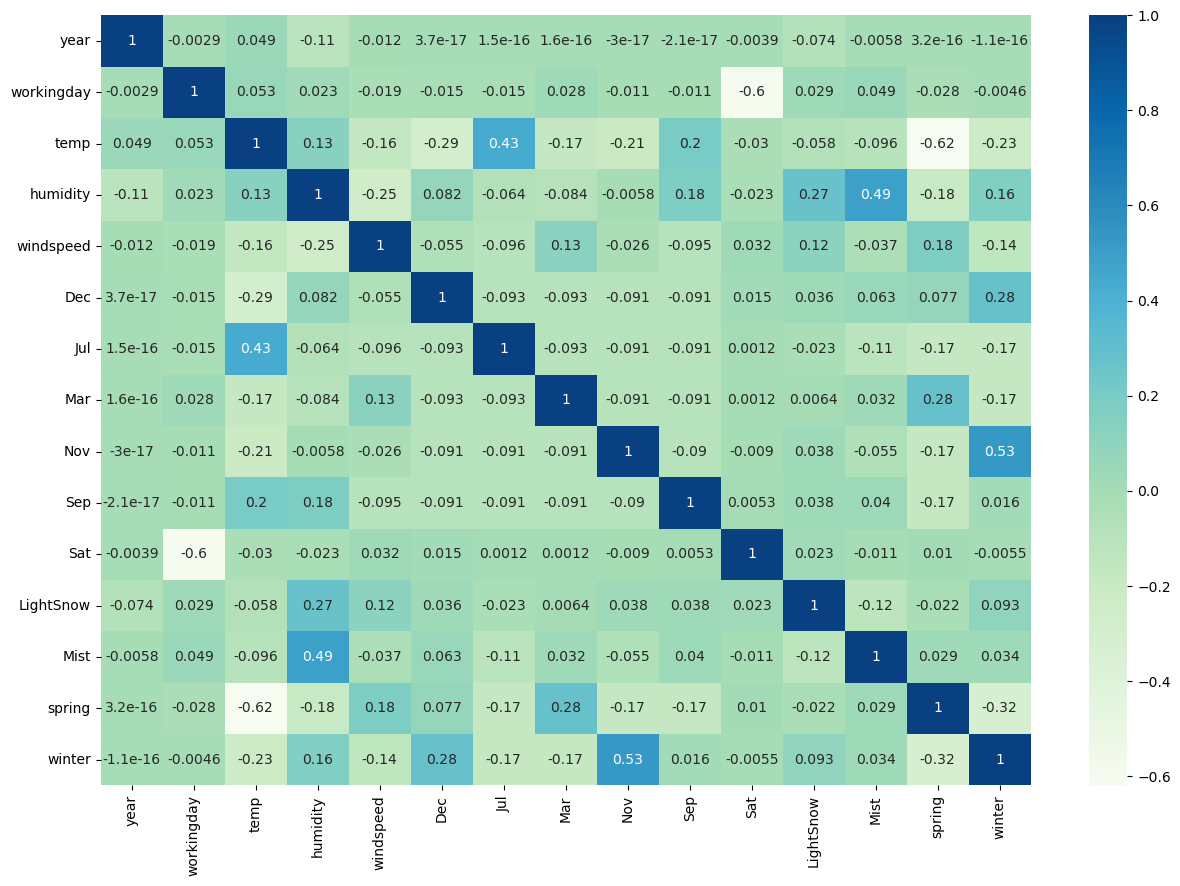

In [66]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(df_Bike[['year', 'workingday', 'temp', 'humidity', 'windspeed', 'Dec', 'Jul',
       'Mar', 'Nov', 'Sep', 'Sat', 'LightSnow', 'Mist', 'spring', 'winter']].corr(), cmap='GnBu', annot=True)
plt.show()

## Model 3

In [67]:
# Dropping column Humidity as it has highest VIF (24.42)
cols = ['year', 'workingday', 'temp', 'windspeed', 'Dec', 'Jul',
       'Mar', 'Nov', 'Sep', 'Sat', 'LightSnow', 'Mist', 'spring', 'winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          7.33e-186
Time:                        13:07:55   Log-Likelihood:                -4127.2
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     496   BIC:                             8348.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2171.9392    242.051      8.973      0.0

In [68]:
# Dropping column Nov as it has negative coefficient and is insignificant.
cols = ['year', 'workingday', 'temp', 'windspeed', 'Dec', 'Jul',
       'Mar', 'Sep', 'Sat', 'LightSnow', 'Mist', 'spring', 'winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          6.81e-183
Time:                        13:07:58   Log-Likelihood:                -4137.0
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     497   BIC:                             8361.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1931.7823    240.163      8.044      0.0

## Model 4

In [69]:
# Dropping column windspeed as it has negative coefficient.
cols = ['year', 'workingday', 'temp','Dec', 'Jul',
       'Mar', 'Sep', 'Sat', 'LightSnow', 'Mist', 'spring', 'winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.4
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          5.82e-181
Time:                        13:08:04   Log-Likelihood:                -4144.3
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     498   BIC:                             8370.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1484.9292    212.370      6.992      0.0

### Model 5

In [70]:
# Dropping column Jul as it has negative coefficient.
cols = ['year', 'workingday', 'temp','Dec',
       'Mar', 'Sep', 'Sat', 'LightSnow', 'Mist', 'spring', 'winter']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          3.09e-180
Time:                        13:08:10   Log-Likelihood:                -4148.8
No. Observations:                 511   AIC:                             8322.
Df Residuals:                     499   BIC:                             8373.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1607.2610    209.988      7.654      0.0

#### We can consider the above Model 5 as our Final Model based on below points:
- VIF is accepted(VIF <5) --->implies low multicollinearity between predictors(independent Variables)
- p-values for all the predictors seems to be significant.p-values are zero for all predictors
- F-Statistics value of 212.3 and Prob(F-statistic): 3.09e-180 i.e almost equals to zero,states that the overall model is   significant

In [71]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [72]:
#Let us build the final model using sklearn
cols = ['year', 'workingday', 'temp','Dec',
       'Mar', 'Sep', 'Sat', 'LightSnow', 'Mist', 'spring', 'winter']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1607.260957104772 [ 2000.71508506   418.09081057  3511.83158446  -325.58941681
   526.1005766    587.53216137   462.53435068 -2370.23251605
  -660.13033275 -1245.81491499   576.5599359 ]


## Model Evaluation


### Residual Analysis

In [73]:
y_train_pred = lr.predict(X_train[cols])

In [74]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

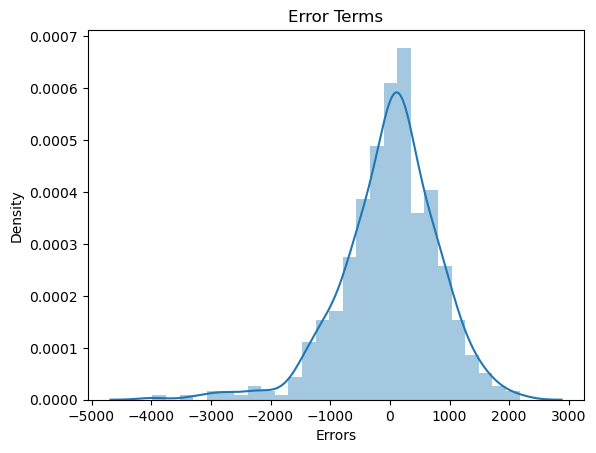

In [75]:
plot_res_dist(y_train, y_train_pred)

Error terms are following Normal Distribution.

In [76]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8239651279853701

### Linearity Check

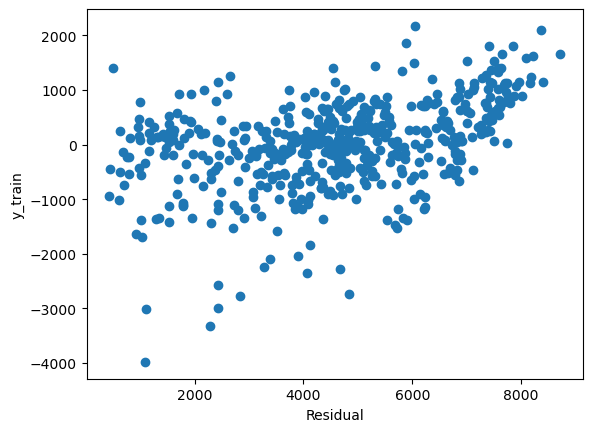

In [77]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Predict values for test data set:

In [78]:
#Scale variables in X_test
num_vars = ['temp','humidity','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [79]:
#Columns from our final model
cols = ['year', 'workingday', 'temp','Dec',
       'Mar', 'Sep', 'Sat', 'LightSnow', 'Mist', 'spring', 'winter']


#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### R-Squared value for test predictions

In [80]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8114961885656741

### Homoscedacity

Inference:
- R2 value for predictions on test data (0.811) is almost same as R2 value of train data(0.823). 
- This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data).

Text(0, 0.5, 'y_test_pred')

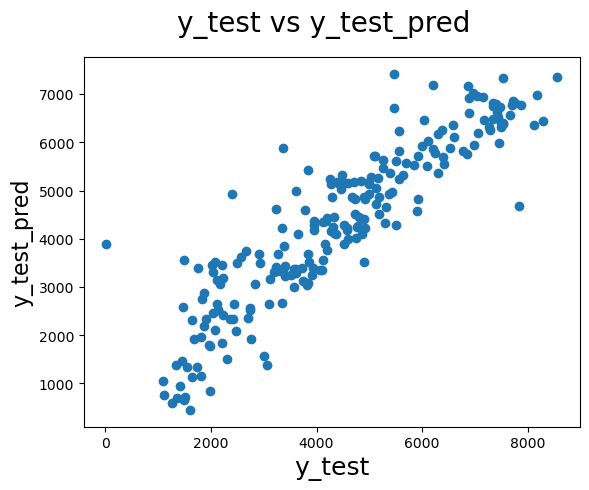

In [81]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_test_pred', fontsize = 16)

Text(0, 0.5, 'y_test_pred')

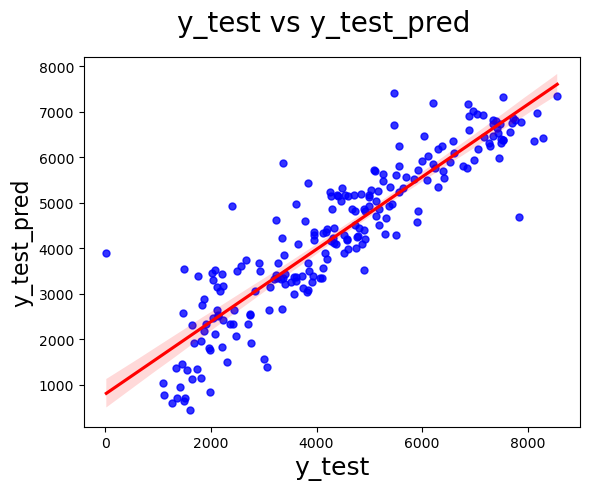

In [82]:
fig = plt.figure()
sns.regplot(x = y_test, y = y_test_pred, line_kws ={'color' : 'red'}, scatter_kws = {'s' : 25, 'color':'blue'})
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

### The equation of our best fitted line is:



$ cnt = 1607.26 + 3511.83*temp + 2000.71*year + 418.09*workingday - 325.58*Dec +526.10*Mar + 587.53*Sep + 462.53*Sat - 2370.23*LightSnow - 660.13*Mist - 1245.81*spring + 576.55*winter $

### Interpretation of  the Final Model:

Analysing the final model, the comapany should focus on the following features:
Company should focus on expanding business during Spring.
Company should focus on expanding business during September.
There would be less bookings during Light Snow or Rain, they could probably use this time to service the bikes without having business impact.
Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.


### Conclusion
Significant variables to predict the demand for shared bikes are:

- temp
- Year (2019)
- windspeed
- Season(Spring and Winter)
- months(March, September, November, December)
- Saturday
- weathersit(LightSnow, Mist)